In [43]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [44]:
data=pd.read_csv('UV_SIGMA_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
x=data.iloc[:,0]
y=data.iloc[:,2]
w=data.iloc[:,1]

#print(stats.stdev(x))
print(data)

               A             B         C   D
0   2.660000e+45  2.350000e+44  0.000065   1
1   3.990000e+43  1.560000e+43  0.003847   2
2   3.690000e+44  1.900000e+44  0.000019   3
3   3.470000e+45  1.280000e+43  0.000015   4
4   5.480000e+43  4.060000e+43  0.000020   5
..           ...           ...       ...  ..
66  1.180000e+45  5.450000e+43  0.000131  67
67  1.820000e+44  3.360000e+43  0.000145  68
68  5.560000e+44  5.120000e+43  0.000138  69
69  9.080000e+44  5.850000e+43  0.000846  70
70  5.440000e+44  1.100000e+44  0.000133  71

[71 rows x 4 columns]


In [45]:
data.describe()

,A,B,C,D
count,7.100000e+01,7.100000e+01,7.100000e+01,71.000000
mean,1.541797e+45,1.996859e+44,2.095958e-02,36.000000
std,2.187646e+45,2.108149e+44,1.644335e-01,20.639767
min,2.810000e+43,4.453430e+00,4.534565e-18,1.000000
25%,3.570000e+44,5.400000e+43,7.433660e-05,18.500000
50%,8.450000e+44,1.170000e+44,1.540140e-04,36.000000
75%,1.795000e+45,2.735000e+44,8.782996e-04,53.500000
max,1.340000e+46,1.150000e+45,1.386519e+00,71.000000


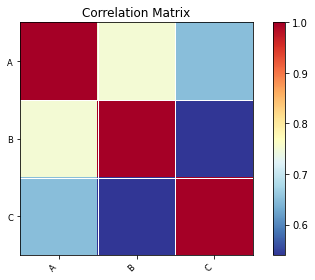

In [46]:
corr = data.set_index('D').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [47]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean

(1.5417971830985915e+45, 0.02095957918423245)

pendiente b1  4.887053452744391e-47
intercepción b0 is -0.05438887328670303


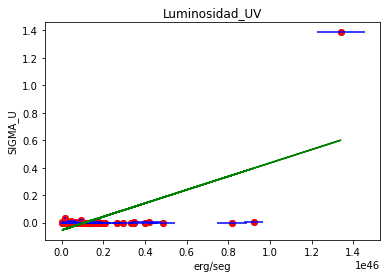

In [48]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = w
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_UV")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('SIGMA_U')
plt.savefig("Luminosidad_UV_SIGMA U .pdf")